# Proyek Analisis Data: [Brazilian E-Commerce Public Dataset by Olist]
- **Nama:** Abdurrahman Al-Adalah
- **Email:** m009d4ky1390@bangkit.academy
- **ID Dicoding:** m009d4ky1390

## Menentukan Pertanyaan Bisnis

- Apa saja top 3 kategori barang yang paling sering dipesan?
- Pada hari apa yang memiliki jumlah transaksi paling banyak?
- Metode pembayaran apa yang paling banyak digunakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
cust_df = pd.read_csv("Datasets/olist_customers_dataset.csv")
orders_df = pd.read_csv("Datasets/olist_orders_dataset.csv")
oritems_df = pd.read_csv("Datasets/olist_order_items_dataset.csv")
orpayments_df = pd.read_csv("Datasets/olist_order_payments_dataset.csv")
products_df = pd.read_csv("Datasets/olist_products_dataset.csv")
cat_translate = pd.read_csv("Datasets/product_category_name_translation.csv")

In [3]:
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
oritems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
orpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

#### Pengecekan data customer

In [8]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
cust_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
cust_dup = cust_df.duplicated().sum()
print("Banyak data duplikat: ", cust_dup)

Banyak data duplikat:  0


In [11]:
cust_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Pengecekan data order

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### Tipe data pada order_purchase_timestamp, approved_at, delivered_carrier_date, delivered_customer_date, order_estimated_delivery_date seharusnya menggunakan tipe data datetime

In [13]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
order_dup = orders_df.duplicated().sum()
print("Banyak data duplikat: ", order_dup)

Banyak data duplikat:  0


#### Pengecekan data order item

In [15]:
oritems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


##### Shipping_limit_date seharusnya menggunakan tipe data datetime

In [16]:
oritems_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
oritems_dup = oritems_df.duplicated().sum()
print('Banyak data duplikat: ', oritems_dup)

Banyak data duplikat:  0


#### Pengecekan data order payment

In [18]:
orpayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
orpayments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [20]:
pay_dup = orpayments_df.duplicated().sum()
print('Banyak data duplikat: ', pay_dup)

Banyak data duplikat:  0


#### Pengecekan data produk

In [21]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
product_dup = products_df.duplicated().sum()
print("Banyak data duplikat: ", product_dup)

Banyak data duplikat:  0


### Cleaning Data

#### Mengatasi missing value pada data product

In [24]:
products_df['product_weight_g'].fillna(method='ffill', inplace=True)
products_df['product_length_cm'].fillna(method='ffill', inplace=True)
products_df['product_height_cm'].fillna(method='ffill', inplace=True)
products_df['product_width_cm'].fillna(method='ffill', inplace=True)
products_df['product_name_lenght'].fillna(method='ffill', inplace=True)
products_df['product_description_lenght'].fillna(method='ffill', inplace=True)
products_df['product_photos_qty'].fillna(method='ffill', inplace=True) 

In [25]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [26]:
products_df.dropna(axis=0, inplace=True)
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Mengatasi kesalahan tipe data pada data order

In [27]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

#### Pada tahap ini saya ingin menyatukan kolom-kolom yang diperlukan dari masing-masing dataset

#### Eksplorasi data order dan order item
Menggabungkan dataframe order dan order item

In [29]:
merge1 = pd.merge(
    products_df[['product_id', 'product_category_name']],
    oritems_df[['product_id', 'order_id', 'seller_id',]],
    on = 'product_id',
    how = 'inner')

In [30]:
pd.DataFrame(merge1)

,product_id,product_category_name,order_id,seller_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,b561927807645834b59ef0d16ba55a24
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,7b07b3c7487f0ea825fc6df75abd658b
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,c510bc1718f0f2961eaa42a23330681a
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,0be8ff43f22e456b4e0371b2245e4d01
...,...,...,...,...
111042,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,59e88b7d3675e89aceaf86f372d3bc9a,4324dd16853115efb0fd9d0d131ba6f4
111043,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,4324dd16853115efb0fd9d0d131ba6f4
111044,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,4324dd16853115efb0fd9d0d131ba6f4
111045,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,4324dd16853115efb0fd9d0d131ba6f4


##### Merubah kolom kategori produk menggunnakan kolom dari dataset product_category_name_translation

##### Mengganti kolom product category yang sebelumnya berbahasa Brazil menjadi bahasa Inggris dengan memasukkan colom dari data set "cat_translate"

In [31]:
merge2 = pd.merge(
    merge1, cat_translate[['product_category_name', 'product_category_name_english']], 
    on='product_category_name', how='inner')
order_info = merge2.drop('product_category_name', axis = 1)

In [32]:
order_info

,product_id,order_id,seller_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,048cc42e03ca8d43c729adf6962cb348,7040e82f899a04d1b434b795a43b4617,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,5fa78e91b5cb84b6a8ccc42733f95742,7040e82f899a04d1b434b795a43b4617,perfumery
3,0d009643171aee696f4733340bc2fdd0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,fe2032dab1a61af8794248c8196565c9,perfumery
4,0d009643171aee696f4733340bc2fdd0,7b13c77c64a9a956500cbf1a9a23798d,7178f9f4dd81dcef02f62acdf8151e01,perfumery
...,...,...,...,...
111018,1dceebcc5f23c02ea23e16d5bedca000,7ed69fbc79fbda50e09caa9c127026e5,4e922959ae960d389249c378d1c939f5,cds_dvds_musicals
111019,1dceebcc5f23c02ea23e16d5bedca000,9c782cb7854e5dfa91927cfca8949eb8,4e922959ae960d389249c378d1c939f5,cds_dvds_musicals
111020,1dceebcc5f23c02ea23e16d5bedca000,cea54c1853c864ab36cea3ef732d7191,4e922959ae960d389249c378d1c939f5,cds_dvds_musicals
111021,1dceebcc5f23c02ea23e16d5bedca000,d4e8d3bb5e3673ed68ac154fe86de946,4e922959ae960d389249c378d1c939f5,cds_dvds_musicals


In [33]:
df = pd.merge(order_info, orders_df[['order_purchase_timestamp', 'order_id']], on = 'order_id', how = 'inner')

In [34]:
df_final = pd.merge(df, orpayments_df[['order_id','payment_type']], on = 'order_id', how = 'inner')

##### Memperoleh dataset final untuk menjawab pertanyaan-pertanyaan

In [35]:
df_final

,product_id,order_id,seller_id,product_category_name_english,order_purchase_timestamp,payment_type
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,perfumery,2018-04-24 16:16:53,debit_card
1,6a2fb4dd53d2cdb88e0432f1284a004c,048cc42e03ca8d43c729adf6962cb348,7040e82f899a04d1b434b795a43b4617,perfumery,2017-11-16 21:28:00,credit_card
2,6a2fb4dd53d2cdb88e0432f1284a004c,5fa78e91b5cb84b6a8ccc42733f95742,7040e82f899a04d1b434b795a43b4617,perfumery,2017-11-30 01:51:23,voucher
3,0d009643171aee696f4733340bc2fdd0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,fe2032dab1a61af8794248c8196565c9,perfumery,2017-07-28 09:34:29,credit_card
4,0d009643171aee696f4733340bc2fdd0,7b13c77c64a9a956500cbf1a9a23798d,7178f9f4dd81dcef02f62acdf8151e01,perfumery,2018-05-17 09:24:18,credit_card
...,...,...,...,...,...,...
115873,1dceebcc5f23c02ea23e16d5bedca000,7ed69fbc79fbda50e09caa9c127026e5,4e922959ae960d389249c378d1c939f5,cds_dvds_musicals,2018-04-20 11:30:06,credit_card
115874,1dceebcc5f23c02ea23e16d5bedca000,9c782cb7854e5dfa91927cfca8949eb8,4e922959ae960d389249c378d1c939f5,cds_dvds_musicals,2017-07-10 11:26:19,credit_card
115875,1dceebcc5f23c02ea23e16d5bedca000,cea54c1853c864ab36cea3ef732d7191,4e922959ae960d389249c378d1c939f5,cds_dvds_musicals,2017-11-04 09:48:44,credit_card
115876,1dceebcc5f23c02ea23e16d5bedca000,d4e8d3bb5e3673ed68ac154fe86de946,4e922959ae960d389249c378d1c939f5,cds_dvds_musicals,2017-10-24 11:15:05,credit_card


##### Menyimpan dataframe untuk digunakan pada Dashboard

In [36]:
#df_final.to_csv("df_final.csv", index=False)

In [37]:
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])

##### Mencari data untuk menjawab pertanyaan 1

In [38]:
cat_count = df_final['product_category_name_english'].value_counts()
pd.DataFrame(cat_count).head(10)

,count
product_category_name_english,
bed_bath_table,11823
health_beauty,9972
sports_leisure,8945
furniture_decor,8744
computers_accessories,8082
housewares,7355
watches_gifts,6201
telephony,4721
garden_tools,4574


##### Mencari data untuk menjawab pertanyaan 2

##### Mengubah value dari timestamp menjadi nama hari

In [39]:
df_final['ord_day_count'] = df_final['order_purchase_timestamp'].dt.day_name()

In [40]:
ord_counts = df_final.groupby('ord_day_count').size().sort_values(ascending=False)
most_orders_day = ord_counts.idxmax()
print('Hari dengan transaksi paling banyak: ', most_orders_day)

Hari dengan transaksi paling banyak:  Monday


In [41]:
order_counts = df_final['ord_day_count'].value_counts()
pd.DataFrame(order_counts)

,count
ord_day_count,
Monday,18863
Tuesday,18790
Wednesday,18112
Thursday,17324
Friday,16532
Sunday,13723
Saturday,12534


In [42]:
order_counts = df_final['ord_day_count'].value_counts()
total_orders = order_counts.sum()
order_percentages = (order_counts / total_orders) * 100
pd.DataFrame(order_percentages)

,count
ord_day_count,
Monday,16.278327
Tuesday,16.215330
Wednesday,15.630232
Thursday,14.950206
Friday,14.266729
Sunday,11.842628
Saturday,10.816548


In [43]:
most_payment = df_final['payment_type'].value_counts()
payment_count = df_final['payment_type'].value_counts().sum()
pd.DataFrame(most_payment)
payment_percentage = (most_payment / payment_count) * 100
pd.DataFrame(payment_percentage)

,count
payment_type,
credit_card,73.804346
boleto,19.453218
voucher,5.311621
debit_card,1.430815


## Visualization & Explanatory Analysis

### Pertanyaan 1:

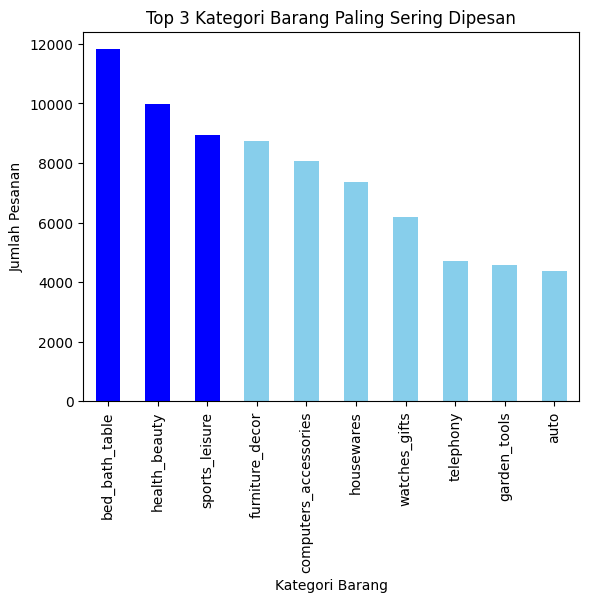

In [49]:
cat_count = df_final['product_category_name_english'].value_counts().head(10)
cat_count.plot(kind='bar', color=('blue', 'blue', 'blue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue'))
plt.title('Top 3 Kategori Barang Paling Sering Dipesan')
plt.xlabel('Kategori Barang')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 2:

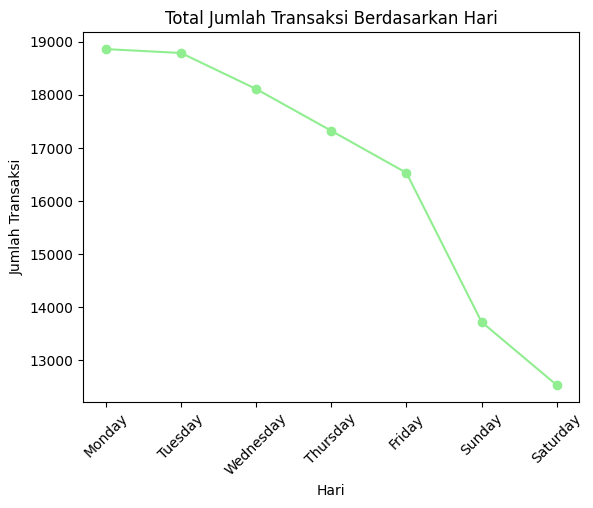

In [58]:
order_counts = df_final['ord_day_count'].value_counts()
order_counts.plot(kind='line', color='lightgreen', marker = 'o')
plt.title('Total Jumlah Transaksi Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3:

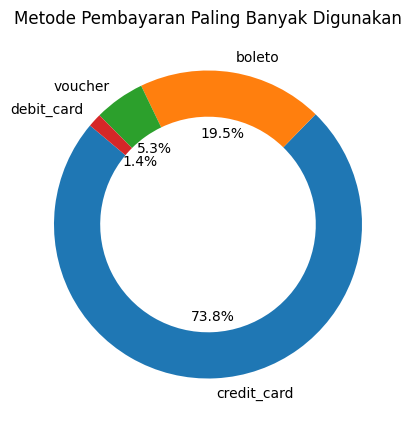

In [56]:
# Menghitung persentase pembayaran
most_payment = df_final['payment_type'].value_counts()
payment_percentage = (most_payment / most_payment.sum()) * 100

# Membuat diagram donat
plt.figure(figsize=(5,5))
plt.pie(payment_percentage, labels=payment_percentage.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Metode Pembayaran Paling Banyak Digunakan')
plt.show()

## Conclusion

- Conclusion pertanyaan 1: Apa saja top 3 kategori barang yang paling sering dipesan?

  Dari data yang telah dilihat, terdapat 3 kategori barang yang memiliki jumlah pesanan paling banyak yaitu dalam kategori
  perlengkapan rumah tangga, barang-barang kesehatan dan kecantikan, dan perlatan olahraga. Dari sini kita bisa melihat
  tren pasar saat ini dan juga melihat kebiasaan pelanggan yang ada di platform tersebut.
  Dari informasi tersebut perusahaan bisa melakukan fokus untuk pengembangan terhadap penjualan pada ketegori-kategori tersebut.
  
- Conclusion pertanyaan 2: Pada hari apa yang memiliki jumlah transaksi paling banyak?

  Pada analisis ini saya ingin melihat bagaimana pola pembelian berdasarkan hari, dimana ternyata kebanyakan pelanggan melakukan transaksi
  pada hari kerja.
  Dari informasi yang didapat bisa mengambil langkah bisnis seperti optimalisasi stok logistik, penjadwalan shift kerja, dan melakukan promosi
  pada weekend untuk meningkatkan penjualan.
  
- Conclusion pertanyaan 3: Metode pembayaran apa yang paling banyak digunakan?

  Melihat dari banyaknya pelanggan yang melakukan pembayaran menggunakan kartu kredit, saya menyimpulkan bahwa konsumen menghargai kemudahan
  dalam kemudahan dan kecepatan transaksi.
  Dari informasi yang sudah didapat kita bisa tahu bahwa penggunaan pembayaran menggunakan kartu kredit menjadi metode transaksi utama untuk
  sebagian besar pelanggan. Hal ini bisa menjadi langkah bisnis yang berdampak pada loyalitas pelanggan dengan mengadakan reward spesial ataupun
  melakukan diskon untuk setiap pembayran menggunakan kartu kredit.
  